In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/content/Data-Sheet.csv')
data.head()

,Material-Id,Elastic Modulus(GPa),Yield strength(MPa),Density(kg/m3),Price (INR/m2 of Sheet)
0,1,27,5,500,50
1,2,29,6,520,55
2,3,31,6,550,60
3,4,33,7,400,65
4,5,35,7,650,70


In [3]:

inp_str = input().split(" ")
input_ID = [int(inp_str[i]) for i in range(10)]

0 1 2 3 4 5 6 7 8 9


In [4]:
# selecting random 10 materials
data_test = data.iloc[sorted(input_ID),:]
data_test

,Material-Id,Elastic Modulus(GPa),Yield strength(MPa),Density(kg/m3),Price (INR/m2 of Sheet)
0,1,27,5,500,50
1,2,29,6,520,55
2,3,31,6,550,60
3,4,33,7,400,65
4,5,35,7,650,70
5,6,37,8,660,75
6,7,39,8,670,80
7,8,41,9,680,85
8,9,43,9,690,90
9,10,45,10,686,95


In [5]:

# Converting the contents of 'data1' to a list and storing the result in 'data_arr'.
data_arr = data_test.values.tolist()
data_arr


[[1, 27, '5', 500, '50'],
 [2, 29, '6', 520, '55'],
 [3, 31, '6', 550, '60'],
 [4, 33, '7', 400, '65'],
 [5, 35, '7', 650, '70'],
 [6, 37, '8', 660, '75'],
 [7, 39, '8', 670, '80'],
 [8, 41, '9', 680, '85'],
 [9, 43, '9', 690, '90'],
 [10, 45, '10', 686, '95']]

In [6]:
# Extracting the value in the second column of the sixth row of 'data_test' and converting it to an integer. This value will be stored in the variable 'E_r'.
# Reference material = ID(6)
E_r = data_test.iloc[5,1]
E_r = int(E_r)
E_r


37

In [7]:
# Calculating the modular ratios of all rows in 'data_arr' by dividing the value in the second column of each row by 'E_r' and storing the results in a new list 'modular_ratio'.
modular_ratio = []
for i in data_arr:
  modular_ratio.append(i[1]/E_r)
modular_ratio


# The modular ratio is a dimensionless quantity that represents the ratio of the elastic modulus of a material to that of a reference material. The reference material in this code is the material with the ID of 6.

[0.7297297297297297,
 0.7837837837837838,
 0.8378378378378378,
 0.8918918918918919,
 0.9459459459459459,
 1.0,
 1.054054054054054,
 1.1081081081081081,
 1.162162162162162,
 1.2162162162162162]

In [8]:
volume = 20*0.2*0.04
volume

0.16

In [9]:
# Extracting the density values of the first 10 rows of the 'data_arr' list using a list comprehension and storing the result in a new list 'density'.
density = [data_arr[i][3] for i in range(10)]
density

[500, 520, 550, 400, 650, 660, 670, 680, 690, 686]

In [10]:
# Calculating the mass of a rectangular object made of each material and storing it in mass list
mass = [density[i]*(volume) for i in range(len(density))]
mass

[80.0,
 83.2,
 88.0,
 64.0,
 104.0,
 105.60000000000001,
 107.2,
 108.8,
 110.4,
 109.76]

In [11]:
# Calculating the force of a rectangular object made of each material and storing it in force list
Force = [mass[i]*9.81 for i in range(10)]
Force

[784.8000000000001,
 816.1920000000001,
 863.2800000000001,
 627.84,
 1020.24,
 1035.9360000000001,
 1051.632,
 1067.328,
 1083.0240000000001,
 1076.7456000000002]

In [12]:
# Calculating the load per unit length for each rectangular object by dividing the force required to hold it against gravity (stored in the 'Force' list) by its length (which is given as 20 m). 
# force_len = Force/length
force_len = [Force[i]/20 for i in range(10)]
force_len


[39.24,
 40.8096,
 43.164,
 31.392000000000003,
 51.012,
 51.796800000000005,
 52.5816,
 53.3664,
 54.1512,
 53.83728000000001]

In [13]:
# Calculating the average load per unit length for the 10 rectangular objects by taking the sum of all load per unit length values in the 'force_len' list and dividing it by 10 (the number of rectangular objects). 
force_len_mean = sum(force_len)/10
force_len_mean

47.135088

In [14]:
# Multiplying each element of the 'modular_ratio' list (which represents the ratio of the modulus of elasticity of each material to the reference material's modulus of elasticity) by a constant value of 0.2 m
new_width=[modular_ratio[i]*(0.2) for i in range(len(modular_ratio))]
new_width

[0.14594594594594595,
 0.15675675675675677,
 0.16756756756756758,
 0.1783783783783784,
 0.1891891891891892,
 0.2,
 0.2108108108108108,
 0.22162162162162163,
 0.23243243243243242,
 0.24324324324324326]

In [15]:
# Multiplying each element of the 'new_width' list (which represents the new width of each rectangular object) by a constant value of 0.04 m
Area=[new_width[i]*(0.04) for i in range(len(new_width))]
Area

[0.005837837837837838,
 0.006270270270270271,
 0.006702702702702703,
 0.007135135135135136,
 0.007567567567567568,
 0.008,
 0.008432432432432432,
 0.008864864864864866,
 0.009297297297297297,
 0.009729729729729731]

In [16]:
# Initializing a new list 'Centroid' with a single value of 0.02 m, which represents the centroid location of the first rectangular object in the 'data_arr' list (since its depth is 0.04 m).
Centroid=[0.02]
# depth of each sheet is 0.04m thus centroid will shift by 0.04m after every sheet
for i in range(1,10):
  x = round(Centroid[i-1]+0.04,2)
  Centroid.append(x)
Centroid


[0.02, 0.06, 0.1, 0.14, 0.18, 0.22, 0.26, 0.3, 0.34, 0.38]

In [17]:
# calculating total area of the sheets stored in Area array
Area_sum = sum(Area)
Area_sum

0.07783783783783785

In [18]:
# Multiplying its cross-sectional area (stored in the 'Area' list) by its centroid location (stored in the 'Centroid' list) to calculate the product of area and centroid.
Area_Centroid_sum = 0
for i in range(len(Centroid)):
  Area_Centroid_sum += Area[i]*Centroid[i]
Area_Centroid_sum



0.016994594594594594

In [19]:
# Calculating the location of the centroid of the composite cross-sectional area by dividing the sum of the products of area and centroid by the total cross-sectional area of all the rectangular objects
Y_0 = Area_Centroid_sum/Area_sum
Y_0

0.2183333333333333

In [20]:
# 2nd Moment of Inertia = I_1 + I_2
# I_1 = new_width*(d^3)/12
# I_2 = Area*(Centroid - Y_0)^2
I_1_lst = [new_width[i]*((0.04)**3)/12 for i in range(len(new_width))]
I_1_lst


[7.783783783783786e-07,
 8.360360360360363e-07,
 8.936936936936939e-07,
 9.513513513513515e-07,
 1.0090090090090092e-06,
 1.066666666666667e-06,
 1.1243243243243244e-06,
 1.1819819819819823e-06,
 1.2396396396396398e-06,
 1.2972972972972977e-06]

In [21]:
I_2_lst = [Area[i]*((Centroid[i]-Y_0)**2) for i in range(len(Area))]
I_2_lst

[0.0002296378378378378,
 0.00015719219219219213,
 9.385645645645639e-05,
 4.378198198198193e-05,
 1.1120120120120104e-05,
 2.222222222222325e-08,
 1.463963963963967e-05,
 5.912372372372376e-05,
 0.00013762582582582596,
 0.00025429729729729747]

In [22]:
Second_MOI = [I_1_lst[i]+I_2_lst[i] for i in range(len(I_1_lst))]
sum(Second_MOI)

0.0010116756756756759

In [23]:
# Moment = (q_mean*(l^2)/8) + (w*l/2)
# w = weight(=20000)
# l = length(=20)

# Total_Moment represents the total moment of the 10 materials about a specified point. It is calculated as the sum of two components:

# The moment due to the distributed load, which is force_len_mean * (20**2) / 8.
moment_load = force_len_mean*(20**2)/8

# The moment due to the weight of the beam, which is 20000 * 20 / 2.
moment_beam = 20000*20/2

Total_Moment = (moment_load) + (moment_beam)
Total_Moment

202356.7544

In [24]:
# Radius Of Curvature = Total_Moment/(Modulus_of_elasticity * 2nd_MOI)
R_cur = Total_Moment/(E_r*sum(Second_MOI))
R_cur
# The radius of curvature is a measure of how much the beam will deform under load. A smaller radius of curvature indicates a greater degree of deformation, while a larger radius of curvature indicates less deformation. 


5405982.966445821

In [25]:
# creating a list Y_1 of length 10 containing the y-coordinates of 10 equally spaced points along the length of the beam, starting at -0.2 m and ending at 0.2 m with a spacing of 0.04 m between each point.
Y_1 = [0.04*i for i in range(-5,5)]
Y_1

# The resulting list Y_1 can be used to calculate the deflection of the beam at each point, given the loading and the properties of the beam.


[-0.2, -0.16, -0.12, -0.08, -0.04, 0.0, 0.04, 0.08, 0.12, 0.16]

In [26]:
# creating a list defl of length 10 containing the deflection of the beam at each of the 10 points along the length of the beam.
defl = [(Y_1[i]-Y_0) for i in range(10)]
defl

# The deflection y at each point is calculated by subtracting the y-coordinate of the centroid Y_0 from the y-coordinate of the point on the beam Y_1[i]. This assumes that the beam is initially straight and horizontal, and that the deflection is measured in the vertical direction. The resulting list defl can be used to plot the deflection curve of the beam, which is a key parameter in analyzing the performance of the beam under load.


[-0.41833333333333333,
 -0.3783333333333333,
 -0.33833333333333326,
 -0.2983333333333333,
 -0.2583333333333333,
 -0.2183333333333333,
 -0.1783333333333333,
 -0.1383333333333333,
 -0.0983333333333333,
 -0.05833333333333329]

In [33]:
# calculating the strain at each of the 10 points along the length of the beam.
# Strain = (-y)*(1/R)
Strain = [(-1*defl[i])*R_cur for i in range(10)]
Strain

# The strain is calculated as the negative product of the deflection y at each point and the radius of curvature R_cur of the beam. This assumes that the beam undergoes pure bending, where the strain is proportional to the curvature of the beam.

# The resulting list Strain can be used to plot the strain curve of the beam, which is another key parameter in analyzing the performance of the beam under load.

[2261502.8742965017,
 2045263.5556386688,
 1829024.236980836,
 1612784.918323003,
 1396545.5996651703,
 1180306.2810073374,
 964066.9623495046,
 747827.6436916718,
 531588.325033839,
 315349.006376006]

In [34]:
# Bending_Moment = ((q*l/1000)+p)*l/4
Bending_Moment = [((force_len[i]*20/1000)+20)*5 for i in range(10)]
Bending_Moment



[103.924,
 104.08096,
 104.3164,
 103.13919999999999,
 105.1012,
 105.17967999999999,
 105.25816,
 105.33664,
 105.41512,
 105.38372799999999]

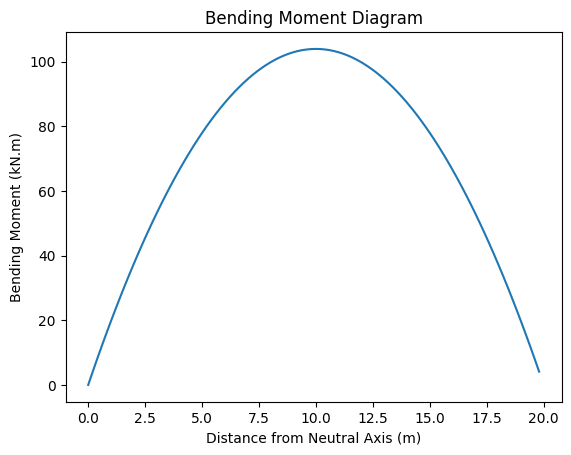

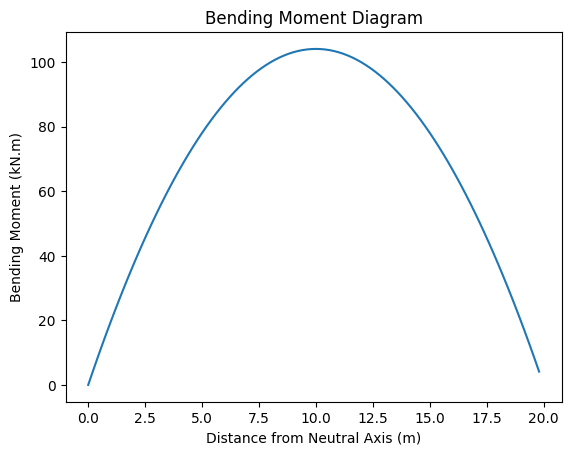

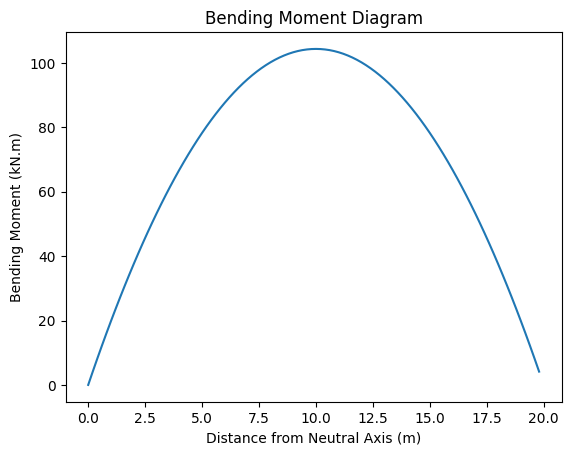

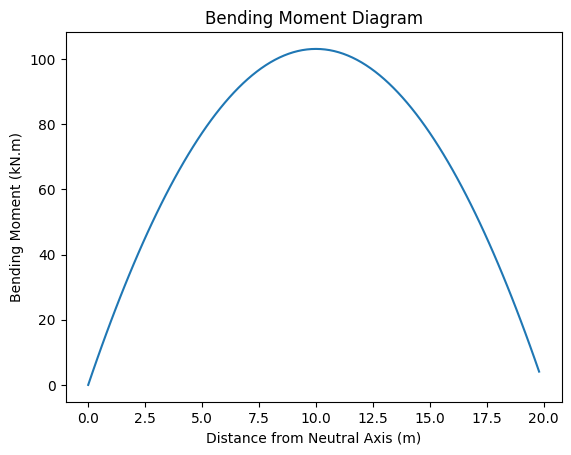

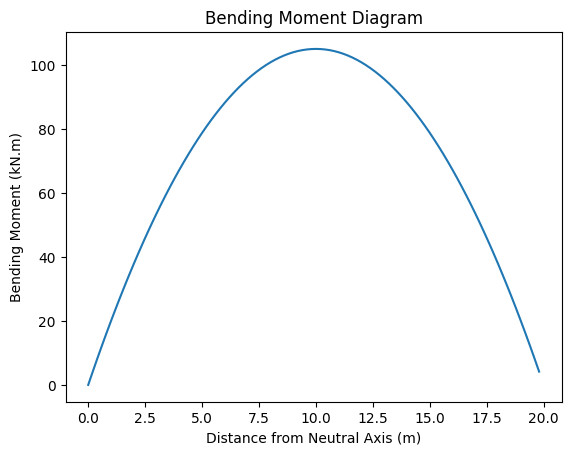

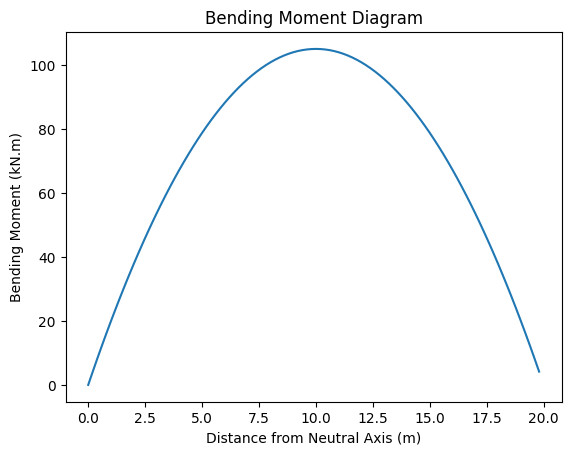

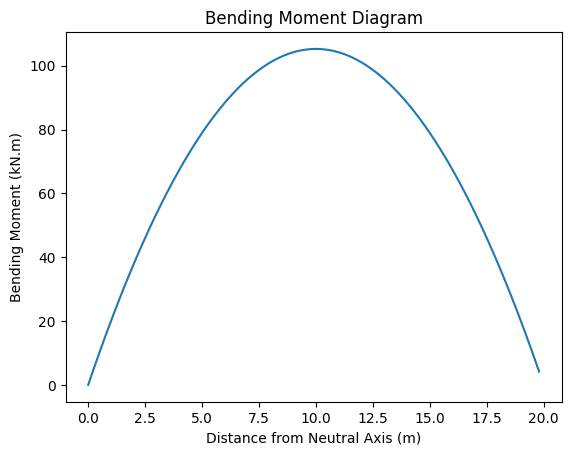

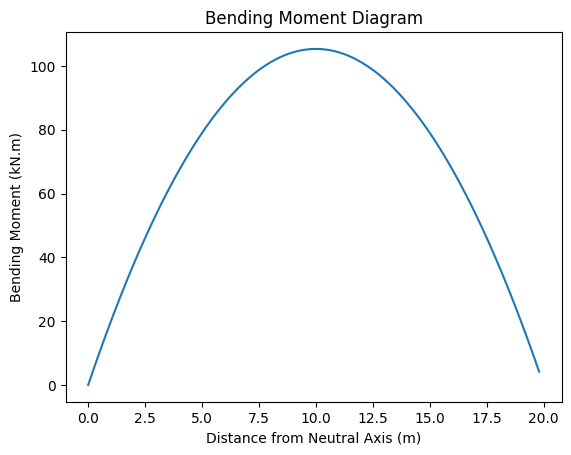

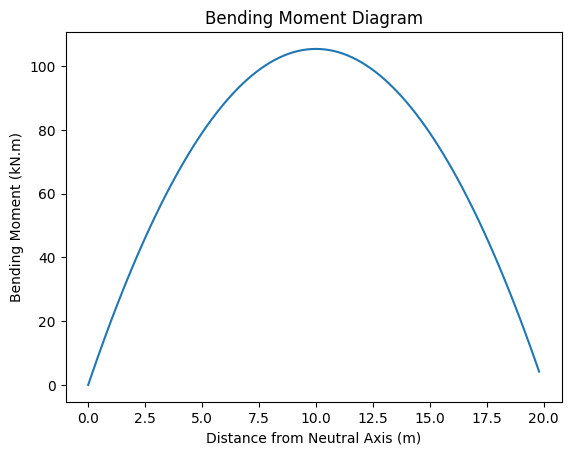

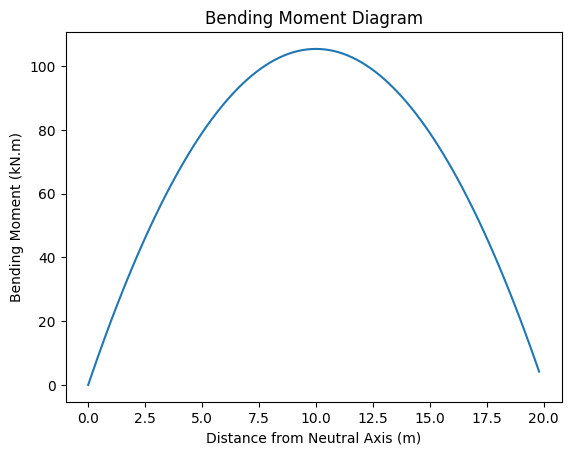

In [35]:
# Plot between Bending Moment and x(distance from neutral axis).
import matplotlib.pyplot as plt

i = 0
step = 0.2
x = []
for j in range(100):
    x.append(i)
    i += step

for bd in Bending_Moment:
    y = []
    for n in x:
        y.append((-bd/100)*n*n + (bd/5)*n)
    plt.figure()
    plt.plot(x, y)
    plt.title("Bending Moment Diagram")
    plt.xlabel("Distance from Neutral Axis (m)")
    plt.ylabel("Bending Moment (kN.m)")
    plt.show()


In [36]:
# Bending Stress = (M*y)/I
Bending_Stress = [(Bending_Moment[i]*Y_1[i]/sum(Second_MOI))/1000 for i in range(10)]
Bending_Stress

[-20.544924129087413,
 -16.46076306903184,
 -12.373499038256035,
 -8.155910237230175,
 -4.1555293866210725,
 0.0,
 4.161735328061551,
 8.32967659756358,
 12.50382380850609,
 16.666800324855735]

In [37]:
for i in range(len(data_arr)):
  if abs(Bending_Stress[i])<=float(data_arr[i][2]):
    print("Material ID = {} ; Pass\n".format(data_arr[i][0]))
  else:
    print("Material ID = {} ; Fail\n".format(data_arr[i][0]))

Material ID = 1 ; Fail

Material ID = 2 ; Fail

Material ID = 3 ; Fail

Material ID = 4 ; Fail

Material ID = 5 ; Pass

Material ID = 6 ; Pass

Material ID = 7 ; Pass

Material ID = 8 ; Pass

Material ID = 9 ; Fail

Material ID = 10 ; Fail



**The toolkit has to be verified with results of homogenous orientation (same material sheets for all ten layers)**

In [38]:
# Homogenity
# defining the dimensions of the beam being used in the application, which are height (h) and width (w), and calculating the total volume of the beam.
h=0.4
w=0.2
Volume  =20*0.2*0.04*10

# calculating the second moment of area (S_Moi) of the beam cross-section, which is used to calculate the bending stress on the beam. The bending moment values are also calculated based on the applied forces, and stored in the list B_Moment_val.
S_Moi = (w*(h**3))/12
B_Moment_val=[]

# calculating the maximum bending stress values experienced by the beam at different locations, based on the bending moment and the distance of the location from the neutral axis (Y_1). These maximum stress values are stored in the list Max_stress.
for i in range(10):
  B_Moment_val.append(((force_len[i]*20/1000)+20)*20/4)
print(B_Moment_val)

Max_stress = []


# comparing the maximum stress values with the yield strength of various materials, which are stored in a data array. If the maximum stress is less than or equal to the yield strength, the material is considered to have passed the analysis and the code prints "Pass" for the corresponding material ID. Otherwise, the material is considered to have failed the analysis and the code prints "Fail" for the corresponding material ID.
for i in range(10):
  Max_stress.append(B_Moment_val[i]*Y_1[i]/(S_Moi*1000))
print(Max_stress)

for i in range(len(data_arr)):
  if abs(Max_stress[i])<=float(data_arr[i][2]):
    print("Material ID = {} ; Pass\n".format(data_arr[i][0]))
  else:
    print("Material ID = {} ; Fail\n".format(data_arr[i][0]))

[103.924, 104.08096, 104.3164, 103.13919999999999, 105.1012, 105.17967999999999, 105.25816, 105.33664, 105.41512, 105.38372799999999]
[-19.48575, -15.612143999999997, -11.735594999999998, -7.735439999999998, -3.9412949999999993, 0.0, 3.9471809999999996, 7.900247999999999, 11.859200999999999, 15.807559199999996]
Material ID = 1 ; Fail

Material ID = 2 ; Fail

Material ID = 3 ; Fail

Material ID = 4 ; Fail

Material ID = 5 ; Pass

Material ID = 6 ; Pass

Material ID = 7 ; Pass

Material ID = 8 ; Pass

Material ID = 9 ; Fail

Material ID = 10 ; Fail



**b) Mechanics based interpretations of shear stress distribution and relevant recommendations while
fabricating the beam**

In [39]:
# shear stress = V*Q/(I*t)
# V = (q*l/2) + w
# Q = (y*0.2*(0.2-y/2))
# t = 0.04
# I = Moment of Inertia
def V(q):
  x = (q*20/2) + 20000
  return x
def Q(y):
  a = (y*0.2*(0.2-(y/2)))
  return a




Text(0.5, 1.0, 'Shear Stress Distribution')

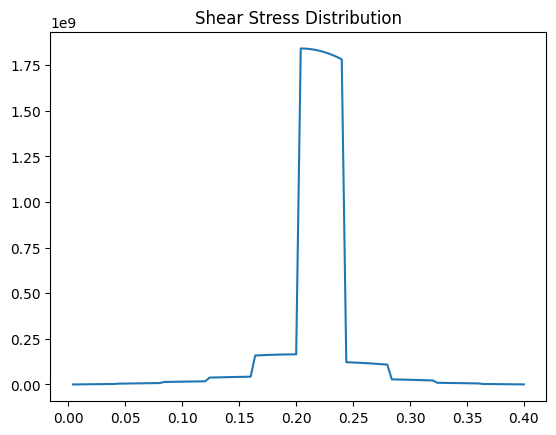

In [40]:
X_axis = np.linspace(0,0.4,101)
X_axis
Y_axis = []
for i in range(len(X_axis)-1):
  Y_axis.append((V(int(i/10))*Q(X_axis[i])/(Second_MOI[int(i/10)]*0.04)))
X_axis = X_axis[1:len(X_axis)]
plt.plot(X_axis,Y_axis)
plt.title("Shear Stress Distribution")

**Cost Estimation**

In [41]:
Cost =[]
for i in range(10):
  print("Material ID = {} ; Price = {}".format(float(data_arr[i][0]),float(data_arr[i][4])*new_width[i]*20))
  Cost.append(float(data_arr[i][4])*new_width[i]*20)
print("\nTotal Price for the composite Beam = {}".format(sum(Cost)))

Material ID = 1.0 ; Price = 145.94594594594594
Material ID = 2.0 ; Price = 172.43243243243245
Material ID = 3.0 ; Price = 201.0810810810811
Material ID = 4.0 ; Price = 231.8918918918919
Material ID = 5.0 ; Price = 264.8648648648649
Material ID = 6.0 ; Price = 300.0
Material ID = 7.0 ; Price = 337.2972972972973
Material ID = 8.0 ; Price = 376.7567567567568
Material ID = 9.0 ; Price = 418.3783783783784
Material ID = 10.0 ; Price = 462.1621621621622

Total Price for the composite Beam = 2910.810810810811
